<a href="https://colab.research.google.com/github/sieuthanthu002/bt-AI-2/blob/main/5_recognition_of_all_members_of_class_from_face_images_(you_collected).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img,img_to_array

folder = '/content/drive/MyDrive/AI/'
photos,labels = list(),list()
for file in listdir(folder):
  if file.startswith('Anh'):
    output = 0
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('Tri'):
    output = 1
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('Nhat'):
    output = 2
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('AN'):
    output = 3
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('Khang'):
    output = 4
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('Truc'):
    output = 5
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('Quan'):
    output = 6
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('dung'):
    output = 7
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos=asarray(photos)
labels=asarray(labels)
print(photos.shape,labels.shape)
save('face.npy',photos)
save('face.npy',labels)

(460, 40, 30, 3) (460,)


In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(40,30,3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
15/15 [==============================] - 3s 20ms/step - loss: 25.8207 - accuracy: 0.2304
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5309 - accuracy: 0.8304
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1100 - accuracy: 0.9761
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9913
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/50
15/15 [==============================] - 0s 4ms/step - loss: 9.4277e-04 - accuracy: 1.0000
Epoch 10/50
15/15 [==============================] - 0s 4ms/step - loss: 7.2147e-04 - accuracy: 1.0000
Epoch 11/

In [31]:
model.evaluate(photos,labels)
model.save('Nhandangkhuonmat.h5')
classes = ["Anh","Tri","Nhat","AN","Khang","Truc","Quan","dung"]

15/15 [==============================] - 0s 3ms/step - loss: 9.3509e-06 - accuracy: 1.0000


1/1 [==============================] - 0s 74ms/step
[[0.10872035 0.10181871 0.09916619 0.09677096 0.10132509 0.10174895
  0.1024604  0.09912157 0.09366917 0.0951986 ]]


'Anh'

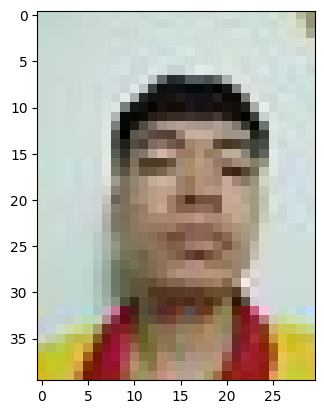

In [32]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/AI/Anh (0).jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 22ms/step
[[0.10168803 0.10768918 0.09605827 0.0982011  0.10126899 0.1023386
  0.104063   0.09865367 0.09372371 0.09631552]]


'Tri'

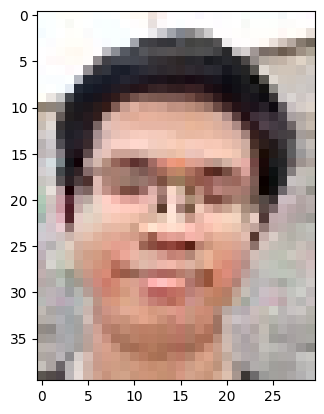

In [33]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/AI/Tri (0).jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 17ms/step
[[0.10039356 0.10009333 0.10172738 0.09766696 0.10784706 0.1021705
  0.10342822 0.09981177 0.09411785 0.09274343]]


'Khang'

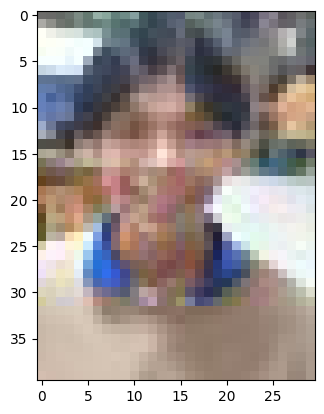

In [34]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/AI/Khang (23).jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step
[[0.1002202  0.10220397 0.09902101 0.09895116 0.1085708  0.10033391
  0.10392924 0.09972478 0.09439691 0.09264805]]


'Khang'

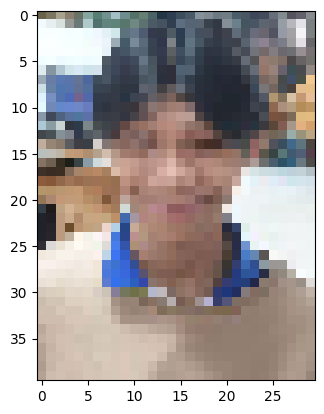

In [35]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/AI_img/341495760_139245912312232_5607884450789146824_n.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 53ms/step
[[0.09878059 0.10091566 0.10129564 0.09990899 0.10133651 0.10244543
  0.11028652 0.10048139 0.09254965 0.09199964]]


'Quan'

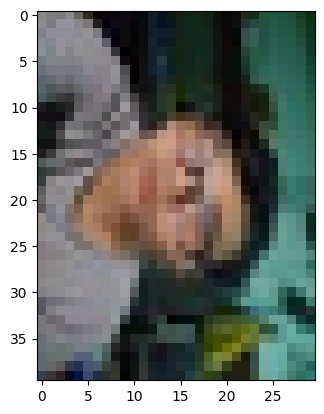

In [39]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/AI/Quan 23.jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 21ms/step
[[0.0961452  0.09924085 0.10371879 0.09924769 0.10084307 0.10096277
  0.10553995 0.10785054 0.09172323 0.09472795]]


'dung'

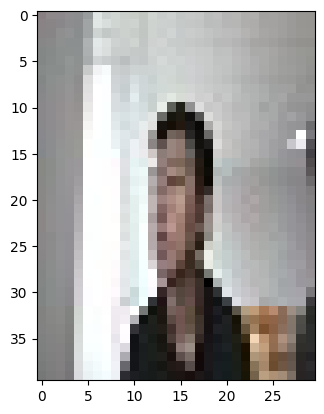

In [40]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/AI/dung (23).jpg', target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]